In [1]:
import base64
from PIL import Image
from io import BytesIO
from openai import OpenAI
import cv2
from matplotlib import pyplot as plt

from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

In [2]:
def encode_video(video_name):
    cur = 0  # 현재 프레임 번호를 저장하는 변수
    video = cv2.VideoCapture(video_name)  # 영상 파일 열기
    base64frames = []  # base64로 인코딩된 프레임을 저장할 리스트

    while video.isOpened():  # 영상이 열려 있는 동안 반복
        success, frame = video.read()  # 프레임 읽기
        if not success:  # 더 이상 프레임이 없으면 반복 종료
            break

        _, buffer = cv2.imencode(".jpg", frame)  # 프레임을 JPEG 형식으로 인코딩

        if cur % 100 == 0:  # 매 100번째 프레임마다 처리
            plt.figure()  # matplotlib 그림 생성 (디버깅 용도 또는 시각화용)
            plt.imshow(frame)  # 프레임 이미지 표시
            base64frames.append(base64.b64encode(buffer).decode("utf-8"))  # base64 문자열로 변환하여 리스트에 추가

        cur = cur + 1  # 프레임 번호 증가

    video.release()  # 영상 파일 닫기
    return base64frames  # base64로 인코딩된 프레임 리스트 반환


In [3]:
# 여러 이미지를 처리하고 텍스트 프롬프트를 함께 전달하는 함수
def img_classification(prompt, image_list):
   
    client = OpenAI(api_key=api_key)

    # image_list 안의 이미지들을 base64 인코딩 후 content에 추가
    contents=[]
    for i in range(len(image_list)):
        contents.append({
            "type": "image_url",
            "image_url":{
                "url": f"data:image/jpeg;base64,{image_list[i]}"
            }
        })

    # 텍스트 프롬프트 추가
    contents.append({
        "type": "text",
        "text": prompt
    })

    # GPT-4o 모델에 메시지 전송
    response = client.chat.completions.create(
        model='gpt-4o',
        messages=[
            {
                "role": "user",
                "content": contents
            }
        ]
    )
    return response.choices[0].message.content



{
  "frames": [
    {
      "timestamp": "05:12:03",
      "person": 1
    },
    {
      "timestamp": "05:12:06",
      "person": 1
    },
    {
      "timestamp": "05:12:10",
      "person": 1
    },
    {
      "timestamp": "05:12:13",
      "person": 1
    },
    {
      "timestamp": "05:12:16",
      "person": 1
    },
    {
      "timestamp": "05:12:20",
      "person": 1
    },
    {
      "timestamp": "05:12:23",
      "person": 1
    },
    {
      "timestamp": "05:12:26",
      "person": 1
    },
    {
      "timestamp": "05:12:30",
      "person": 0
    },
    {
      "timestamp": "05:12:33",
      "person": 0
    },
    {
      "timestamp": "05:12:36",
      "person": 0
    },
    {
      "timestamp": "05:12:40",
      "person": 0
    },
    {
      "timestamp": "05:12:43",
      "person": 0
    },
    {
      "timestamp": "05:12:46",
      "person": 0
    }
  ]
}


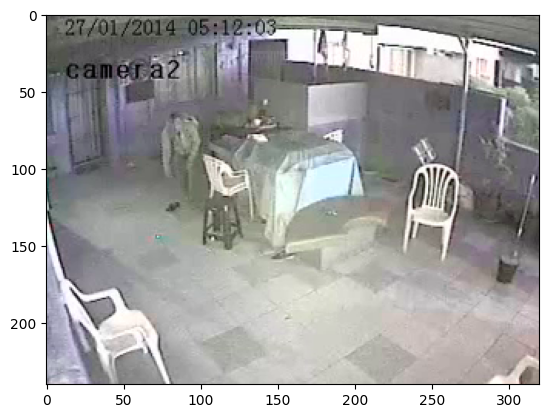

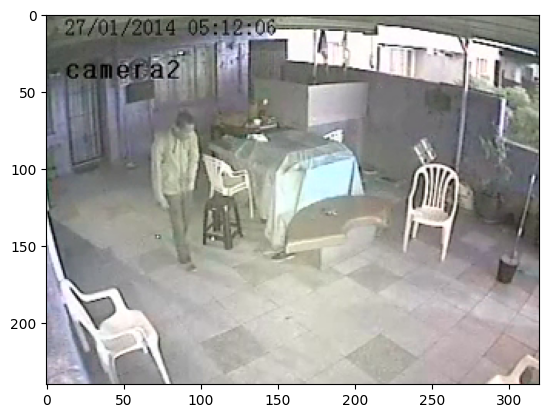

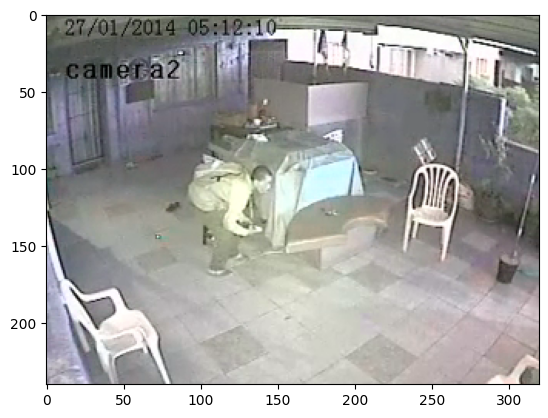

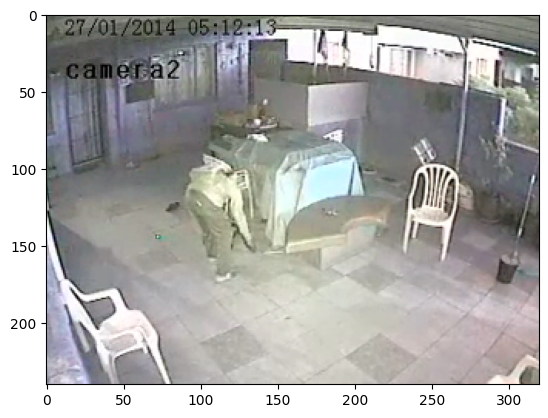

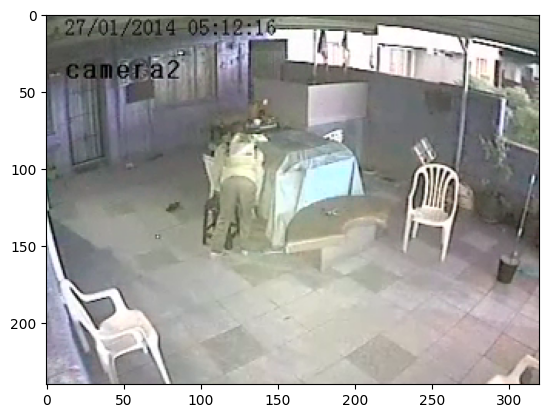

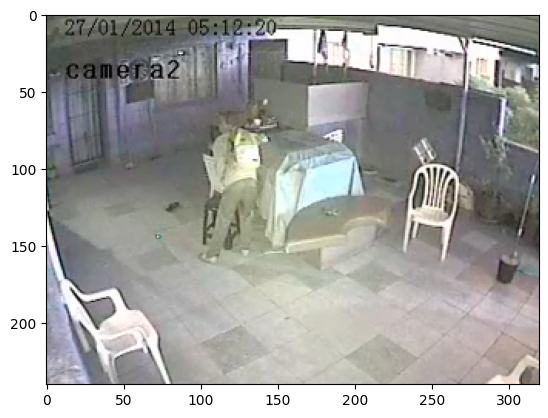

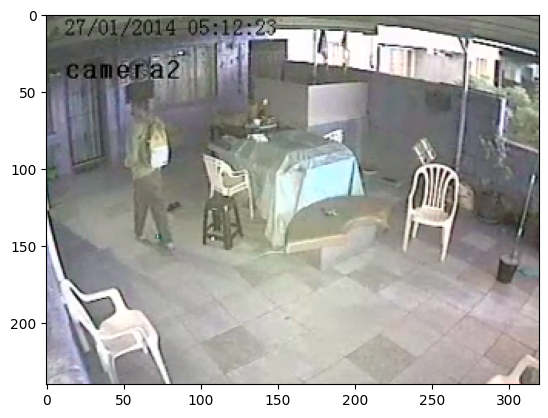

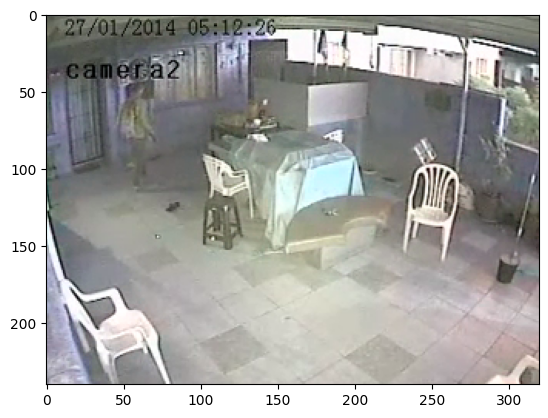

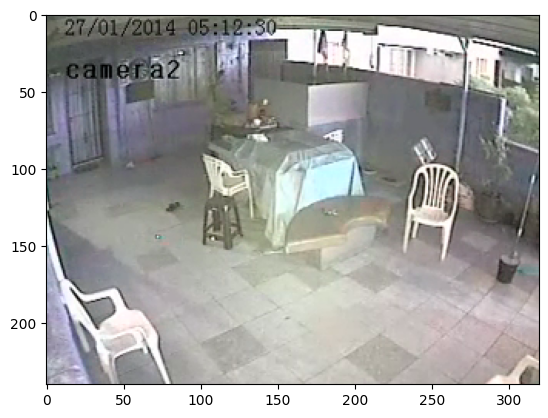

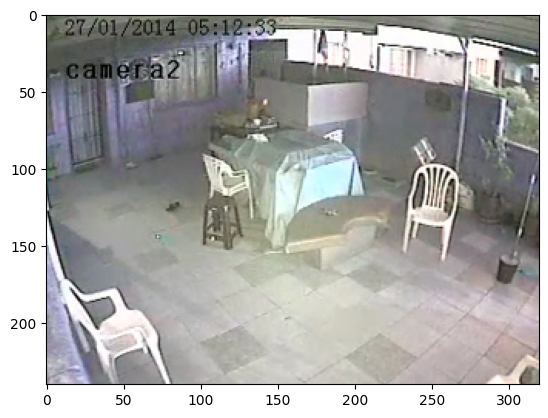

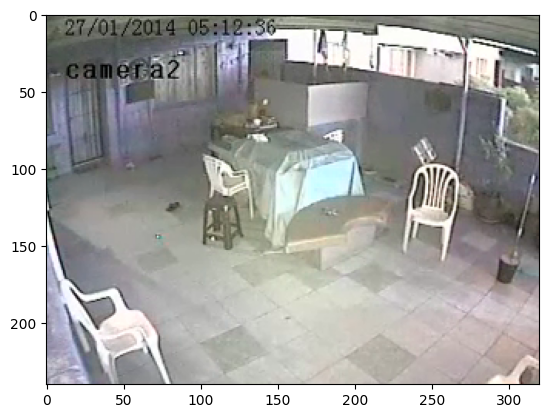

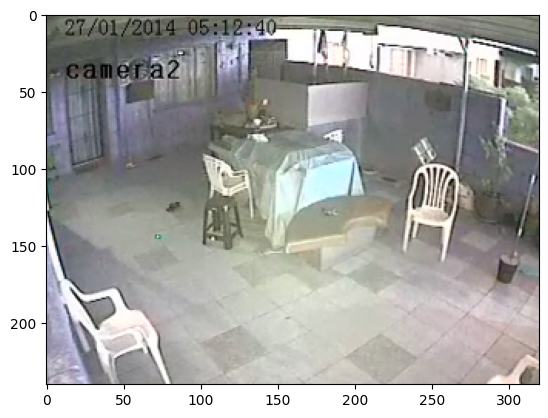

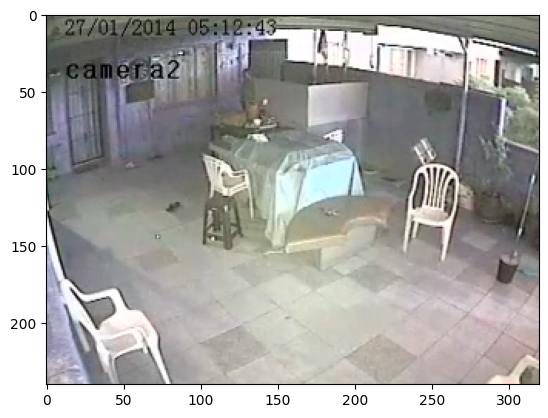

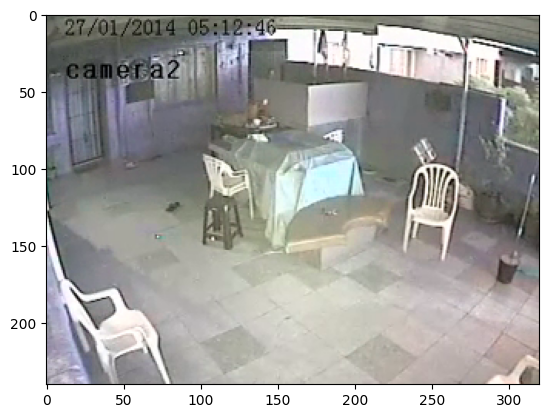

In [4]:
prompt = f"""
동영상의 프레임이 차례대로 주어질거야. 각 프레임 간의 차이점을 알려줘.
"""

prompt2 = f"""
동영상의 프레임이 차례대로 주어질거야. 각 프레임에 적힌 시간과 사람의 출현 여부를 JSON format으로 알려줘.
키값 'timestamp'에 영상에 찍힌 시간을 쓰고, 'person'이라는 키에 사람이 없으면 0, 있으면 1을 할당해줘.
markdown format은 포함시키지 말아줘.
"""
response = img_classification(prompt2, encode_video('images/Burglary.mp4'))
print(response)